In [1]:
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
data_df = pd.read_csv('../data/initial_measures_compliance_demo.csv')
print data_df.shape
data_df.head()

(629, 42)


,pin,d.o.b.,medicaid,hospitalized,rpm_hospitalized,rpm_falls,rehospitalized,rpm_rehospitalized,chf,copd,diabetes,hypertension,stroke,hypoglycemia,falls,liver_disease,hypotension,obesity,coronary_artery_disease,fractures,renal,alzheimers,depression,status_active,gender_f,gender_m,lang_english,lang_other,lang_spanish,caregiver,live_alone,missed_wks,total_wks,first_measure_date,compliance,systolic,diastolic,heartrate,weight,spo2,heartrate_spo2,age
0,10001,1940-12-22,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,12,53,2015-07-13,0.773585,147.0,68.0,55.0,269.2,97.0,57.0,27231 days 00:00:00.000000000
1,10002,1933-04-24,0.0,0.0,NaN,1.0,0.0,NaN,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,24,50,2015-08-10,0.520000,135.0,74.0,69.0,195.8,96.0,62.0,30058 days 00:00:00.000000000
2,10004,1948-12-15,0.0,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,NaN,NaN,1,2,2015-12-21,0.500000,110.0,75.0,72.0,252.0,97.0,71.0,24477 days 00:00:00.000000000
3,10006,1948-11-28,0.0,0.0,NaN,NaN,0.0,NaN,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,24,51,2015-07-20,0.529412,122.0,78.0,61.0,250.7,97.0,60.0,24340 days 00:00:00.000000000
4,10009,1927-10-06,0.0,0.0,NaN,NaN,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9,53,2015-07-13,0.830189,144.0,86.0,72.0,152.1,93.0,71.0,32057 days 00:00:00.000000000


In [3]:
print data_df.shape
print 'Drop all NA', data_df.dropna().shape
print data_df.count()

(629, 42)
Drop all NA (24, 42)
pin                        629
d.o.b.                     521
medicaid                   459
hospitalized               520
rpm_hospitalized            97
rpm_falls                   56
rehospitalized             518
rpm_rehospitalized          95
chf                        629
copd                       629
diabetes                   629
hypertension               629
stroke                     629
hypoglycemia               629
falls                      629
liver_disease              629
hypotension                629
obesity                    629
coronary_artery_disease    629
fractures                  629
renal                      629
alzheimers                 629
depression                 629
status_active              629
gender_f                   629
gender_m                   629
lang_english               629
lang_other                 629
lang_spanish               629
caregiver                  515
live_alone                 515
missed_w

In [4]:
data_df['rpm_hospitalized'].value_counts(dropna=False)

NaN     532
 1.0     95
 0.0      2
Name: rpm_hospitalized, dtype: int64

In [5]:
data_df['rpm_rehospitalized'].value_counts(dropna=False)

NaN     534
 0.0     75
 1.0     20
Name: rpm_rehospitalized, dtype: int64

### Recode NANs from rpm columns to 0 (No)

In [106]:
for col in [u'rpm_hospitalized',u'rpm_falls']:
    data_df[col]=data_df[col].replace([0,1,np.nan],[0,1,0])
print data_df['rpm_hospitalized'].value_counts(dropna=False)
print data_df['rpm_rehospitalized'].value_counts(dropna=False)
print data_df['alzheimers'].value_counts(dropna=False)
print data_df['hypotension'].value_counts(dropna=False)
print data_df['renal'].value_counts(dropna=False)
print data_df['fractures'].value_counts(dropna=False)
print data_df['falls'].value_counts(dropna=False)

0.0    534
1.0     95
Name: rpm_hospitalized, dtype: int64
NaN     534
 0.0     75
 1.0     20
Name: rpm_rehospitalized, dtype: int64
0    623
1      6
Name: alzheimers, dtype: int64
0    626
1      3
Name: hypotension, dtype: int64
0    620
1      9
Name: renal, dtype: int64
0    621
1      8
Name: fractures, dtype: int64
0    613
1     16
Name: falls, dtype: int64


In [108]:
new_data = data_df.drop(['pin', 'd.o.b.', 'rpm_rehospitalized', 'rpm_falls', 'gender_m', 'alzheimers','hypotension','lang_other',
                         'missed_wks', 'total_wks', 'first_measure_date', 'status_active','medicaid','lang_english','heartrate_spo2',
                        'hypoglycemia','fractures','renal','liver_disease'], axis = 1)
new_data.dropna(inplace=True)
new_data.reset_index(drop=True,inplace=True)
print new_data.shape
new_data.dtypes

(435, 23)


hospitalized               float64
rpm_hospitalized           float64
rehospitalized             float64
chf                          int64
copd                         int64
diabetes                     int64
hypertension                 int64
stroke                       int64
falls                        int64
obesity                      int64
coronary_artery_disease      int64
depression                   int64
gender_f                   float64
lang_spanish               float64
caregiver                  float64
live_alone                 float64
compliance                 float64
systolic                   float64
diastolic                  float64
heartrate                  float64
weight                     float64
spo2                       float64
age                         object
dtype: object

In [109]:
new_data['age']=new_data['age'].apply(lambda x: pd.tslib.Timedelta(x).days)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000029B819B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002AF07DA0>]], dtype=object)

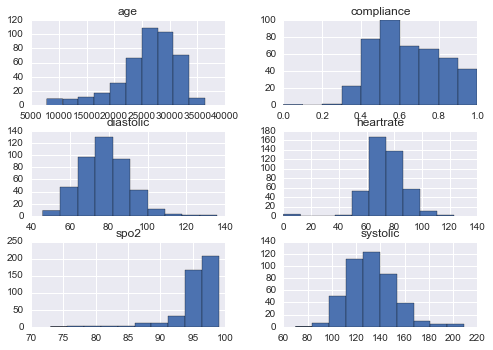

In [110]:
#continuous_feats = ['age','heartrate_spo2','spo2','heartrate','diastolic','systolic']
continuous_feats = ['age','compliance','spo2','heartrate','diastolic','systolic']

new_data[continuous_feats].hist()

In [111]:
new_data[continuous_feats].describe()

,age,compliance,spo2,heartrate,diastolic,systolic
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,26079.965517,0.640206,95.691954,73.754023,77.565517,132.036782
std,5295.376217,0.183520,3.128110,14.352113,12.427382,19.452495
min,7842.000000,0.000000,73.000000,0.000000,46.000000,70.000000
25%,23917.500000,0.500000,95.000000,65.500000,69.000000,119.000000
50%,27105.000000,0.618182,96.000000,73.000000,77.000000,130.000000
75%,29779.500000,0.785109,97.000000,82.000000,85.000000,144.000000
max,36391.000000,1.000000,99.000000,123.000000,136.000000,209.000000


In [112]:
# For each feature find the data points with extreme high or low values
for feature in continuous_feats:
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(new_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(new_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print (new_data[~((new_data[feature] >= Q1 - step) & (new_data[feature] <= Q3 + step))]).index
    display(new_data[~((new_data[feature] >= Q1 - step) & (new_data[feature] <= Q3 + step))])
    

Data points considered outliers for the feature 'age':
Int64Index([187, 195, 197, 198, 217, 219, 222, 228, 232, 238, 240, 241, 243,
            244, 248, 251, 256, 257, 261, 262, 291, 298],
           dtype='int64')


,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
187,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.500000,112.0,72.0,63.0,185.4,99.0,13576
195,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.413043,133.0,91.0,109.0,230.8,98.0,11306
197,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.513514,142.0,97.0,104.0,185.6,97.0,13362
198,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.423077,118.0,90.0,82.0,195.3,99.0,10058
217,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.500000,108.0,74.0,74.0,204.4,98.0,9947
219,0.0,1.0,0.0,0,0,0,1,0,0,1,0,1,1.0,0.0,0.0,1.0,0.660000,152.0,96.0,75.0,334.9,98.0,13461
222,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.595745,94.0,74.0,63.0,134.9,98.0,12217
228,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,1.000000,98.0,63.0,67.0,135.0,99.0,13963
232,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.720000,102.0,67.0,85.0,132.9,99.0,10636
238,0.0,1.0,0.0,0,0,1,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.604167,146.0,99.0,97.0,245.4,97.0,13480


Data points considered outliers for the feature 'compliance':
Int64Index([151], dtype='int64')


,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
151,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,1.0,1.0,1.0,1.0,0.0,92.0,71.0,69.0,116.0,97.0,24288


Data points considered outliers for the feature 'spo2':
Int64Index([ 34,  96, 133, 144, 156, 166, 177, 200, 210, 253, 257, 266, 267,
            303, 310, 317, 318, 320, 321, 327, 350, 359, 364, 365, 375, 378,
            387, 398, 415],
           dtype='int64')


,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
34,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.943396,90.0,72.0,87.0,159.8,88.0,34190
96,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.460000,118.0,52.0,57.0,111.0,80.0,32282
133,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0,0.872727,136.0,77.0,89.0,134.9,87.0,26130
144,1.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1.000000,95.0,57.0,64.0,171.1,90.0,29057
156,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.400000,152.0,90.0,71.0,119.3,88.0,28871
166,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.773585,122.0,72.0,87.0,179.7,87.0,30396
177,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.631579,121.0,58.0,78.0,147.0,90.0,26255
200,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.840000,126.0,90.0,67.0,194.0,76.0,17174
210,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.673469,98.0,76.0,83.0,164.2,73.0,21915
253,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.500000,116.0,83.0,98.0,119.3,90.0,17161


Data points considered outliers for the feature 'heartrate':
Int64Index([83, 176, 192, 195, 212, 225, 231, 329, 344, 349, 407, 409], dtype='int64')


,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
83,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.607843,120.0,86.0,123.0,178.1,97.0,29497
176,1.0,1.0,0.0,0,0,1,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.538462,170.0,93.0,107.0,268.1,95.0,25584
192,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,1.000000,112.0,80.0,107.0,215.8,94.0,21289
195,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.413043,133.0,91.0,109.0,230.8,98.0,11306
212,1.0,1.0,0.0,0,0,1,1,1,0,0,0,0,1.0,0.0,0.0,1.0,0.392857,159.0,102.0,109.0,229.3,97.0,24697
225,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.550000,127.0,103.0,113.0,202.4,97.0,22674
231,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.585366,144.0,96.0,109.0,145.1,99.0,20329
329,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.870968,117.0,58.0,0.0,159.0,94.0,25759
344,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,1.0,0.754098,140.0,66.0,0.0,159.0,97.0,31184
349,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.512195,159.0,80.0,118.0,97.2,96.0,31375


Data points considered outliers for the feature 'diastolic':
Int64Index([251, 255, 256, 372, 386], dtype='int64')


,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
251,1.0,0.0,0.0,0,0,0,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.428571,150.0,110.0,81.0,260.4,97.0,14833
255,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.523810,145.0,136.0,64.0,185.8,98.0,21522
256,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.600000,154.0,118.0,84.0,159.0,98.0,13696
372,0.0,0.0,0.0,1,0,0,1,0,0,0,1,0,1.0,0.0,0.0,0.0,0.559322,157.0,111.0,85.0,219.4,94.0,29670
386,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.791667,164.0,114.0,63.0,156.0,97.0,32234


Data points considered outliers for the feature 'systolic':
Int64Index([17, 33, 48, 104, 203, 260, 382, 399, 402], dtype='int64')


,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
17,1.0,0.0,1.0,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,1.0,0.857143,199.0,101.0,71.0,133.0,97.0,28114
33,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.711538,205.0,91.0,72.0,172.0,94.0,27544
48,1.0,1.0,1.0,0,1,0,1,0,1,0,0,0,1.0,0.0,0.0,1.0,0.590909,182.0,63.0,60.0,96.8,97.0,28063
104,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.860000,182.0,94.0,69.0,259.9,96.0,26636
203,0.0,1.0,0.0,0,0,1,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.740000,205.0,108.0,66.0,181.4,98.0,19564
260,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.714286,193.0,84.0,75.0,185.0,99.0,20417
382,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.842105,70.0,48.0,58.0,161.6,96.0,25738
399,0.0,0.0,0.0,0,0,1,1,0,0,1,0,0,1.0,0.0,0.0,0.0,0.534483,183.0,87.0,70.0,281.7,93.0,25019
402,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.769231,209.0,95.0,61.0,160.9,94.0,31769


In [113]:
# OPTIONAL: Select the indices for data points you wish to remove
age_outliers  = [187, 195, 197, 198, 217, 219, 222, 228, 232, 238, 240, 241, 243,
            244, 248, 251, 256, 257, 261, 262, 291, 298]
spo2_outliers = [200,210]
hr_outliers = [329, 344, 407, 409]
compl_outliers = [151]
outliers = age_outliers + hr_outliers + spo2_outliers + compl_outliers
# Remove the outliers, if any were specified
good_data = new_data.drop(new_data.index[outliers]).reset_index(drop = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002B10E6D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002BB0D1D0>]], dtype=object)

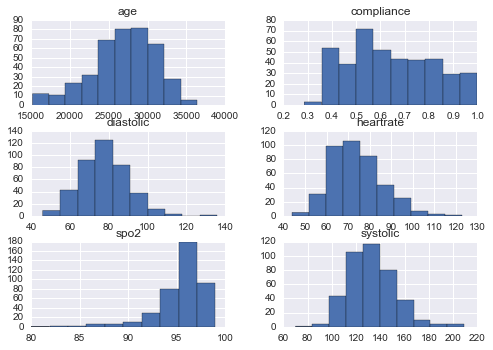

In [114]:
good_data[continuous_feats].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002BD2F4E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002C76C080>]], dtype=object)

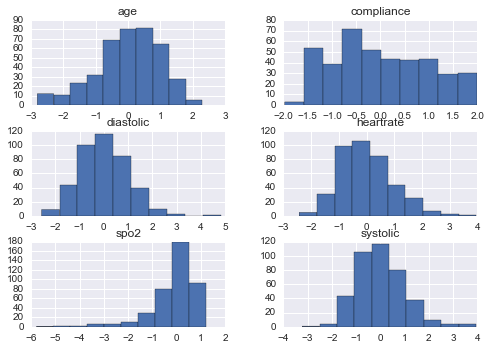

In [115]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
nrmlzr = Normalizer()
stdsclr = StandardScaler()
#good_data[continuous_feats] = nrmlzr.fit_transform(good_data[continuous_feats])
good_data[continuous_feats] = stdsclr.fit_transform(good_data[continuous_feats])
good_data[continuous_feats].hist()

In [122]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(good_data.drop(['rpm_hospitalized'],axis=1), good_data['rpm_hospitalized'], stratify=good_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)

score = clf.score(X_test,y_test)
print score

0.80487804878


In [136]:
from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],index=new_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['log coef']=np.exp(lr_result['coef'])
lr_result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)
0.808219178082
<function _passthrough_scorer at 0x000000000E1493C8>
0.80487804878


,coef,log coef
hospitalized,0.156079,1.168919
rehospitalized,0.347933,1.416138
chf,0.233467,1.262971
copd,0.000000,1.000000
diabetes,0.000000,1.000000
hypertension,0.188925,1.207951
stroke,0.245870,1.278733
falls,0.173813,1.189833
obesity,0.302226,1.352867
coronary_artery_disease,-0.284028,0.752745


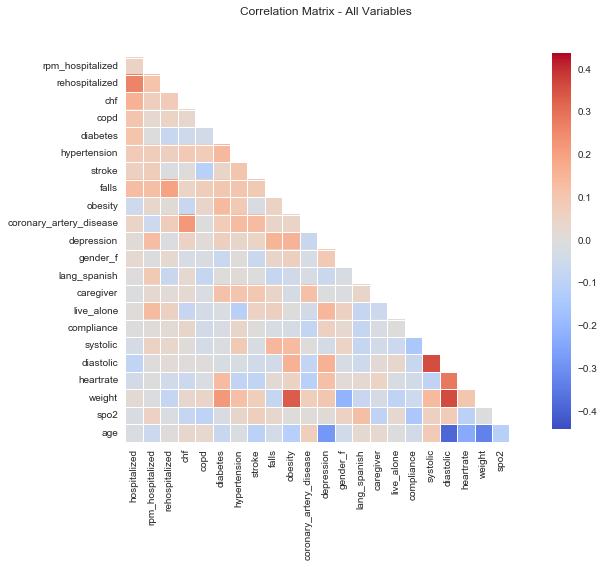

In [124]:
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(good_data, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

In [128]:
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
# fit the model
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.431680
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                  365
Model:                          Logit   Df Residuals:                      342
Method:                           MLE   Df Model:                           22
Date:                Wed, 17 Aug 2016   Pseudo R-squ.:                  0.1096
Time:                        15:29:18   Log-Likelihood:                -157.56
converged:                       True   LL-Null:                       -176.96
                                        LLR p-value:                   0.01488
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                      -2.8666      0.955     -3.001      0.003        -4.739 

In [129]:
print result.conf_int()

                                0         1
const                   -4.738837 -0.994415
hospitalized            -0.549650  0.788783
rehospitalized          -0.484030  2.031606
chf                     -0.688118  2.245376
copd                    -0.684533  1.077985
diabetes                -0.747746  0.650233
hypertension            -0.369994  0.834258
stroke                  -0.630874  1.568074
falls                   -0.948025  2.106992
obesity                 -0.678958  1.252199
coronary_artery_disease -1.925249  0.319681
depression              -0.284183  1.754920
gender_f                -1.020614  0.431479
lang_spanish             0.042147  1.514189
caregiver               -0.911839  1.849380
live_alone               0.376133  1.890601
compliance              -0.179944  0.393192
systolic                -0.070310  0.610377
diastolic               -0.751785  0.045812
heartrate               -0.182212  0.429286
weight                  -0.007579  0.010107
spo2                    -0.05310

In [130]:
print np.exp(result.params)

const                      0.056891
hospitalized               1.127008
rehospitalized             2.167963
chf                        2.178483
copd                       1.217410
diabetes                   0.952413
hypertension               1.261286
stroke                     1.597756
falls                      1.785117
obesity                    1.331919
coronary_artery_disease    0.448080
depression                 2.086250
gender_f                   0.744854
lang_spanish               2.177480
caregiver                  1.598028
live_alone                 3.106097
compliance                 1.112516
systolic                   1.310008
diastolic                  0.702587
heartrate                  1.131492
weight                     1.001265
spo2                       1.349234
age                        0.793644
dtype: float64


for all the factors, we can see that being previously hospitalized increases the odd to be rpm_hospitalized by 12%. Larger factors are live_alone (210%), lang_spanish(117%), depression(108%), chf(117%), and rehospitalized(116%). For continuous variables, a unit increase in that value yields the corresponding increase in 

In [59]:
print result.mle_retvals

{'fopt': 0.42210151480731628, 'score': array([ -2.22414112e-13,  -6.78611904e-14,   2.63933388e-18,
        -9.62542929e-14,  -1.54526017e-13,  -1.05398989e-13,
        -8.43054324e-16,  -8.51398025e-19,  -6.78569334e-14,
        -1.79564322e-11,  -2.35134917e-48,  -1.70279605e-18,
        -6.13534445e-14,   5.95978618e-19,  -1.02167763e-18,
        -1.71356639e-59,   8.51398025e-20,  -2.58933979e-13,
        -9.62679152e-14,  -1.15459848e-11,  -1.54094869e-13,
        -4.26720690e-16,  -2.84421430e-13,  -2.18735732e-13,
        -4.17336186e-11,  -2.57512893e-11,  -2.46461556e-11,
        -6.75357357e-11,  -3.07636234e-11,  -2.45454591e-11,
        -8.02698821e-09]), 'iterations': 35, 'converged': False, 'warnflag': 1, 'Hessian': array([[ -3.63913798e-02,  -5.64883035e-03,  -3.98375629e-03,
         -6.95879766e-03,  -8.96230040e-03,  -2.39918820e-02,
         -3.04034541e-03,  -6.38469733e-04,  -1.19918353e-03,
         -1.10524935e-11,  -0.00000000e+00,  -1.90960031e-03,
         -3.